In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import EngFormatter

In [60]:
territory_lookup = pd.read_csv(r"E:\powerbidataset\AdventureWorks Territory Lookup.csv")
product_lookup = pd.read_csv(r"E:\powerbidataset\AdventureWorks Product Lookup.csv")
product_categories_lookup = pd.read_csv(r"E:\powerbidataset\AdventureWorks Product Categories Lookup.csv")
product_subcategories_lookup = pd.read_csv(r"E:\powerbidataset\AdventureWorks Product Subcategories Lookup.csv")
customer_lookup = pd.read_csv(r"E:\powerbidataset\AdventureWorks Customer Lookup.csv", encoding='1252')
calender_lookup = pd.read_csv(r"E:\powerbidataset\AdventureWorks Calendar Lookup.csv")
Sales_Data_2020 = pd.read_csv(r"E:\powerbidataset\Sales Data\AdventureWorks Sales Data 2020.csv")
Sales_Data_2021 = pd.read_csv(r"E:\powerbidataset\Sales Data\AdventureWorks Sales Data 2021.csv")
Sales_Data_2022 = pd.read_csv(r"E:\powerbidataset\Sales Data\AdventureWorks Sales Data 2022.csv")
returns_data = pd.read_csv(r"E:\powerbidataset\AdventureWorks Returns Data.csv")
sales_data = pd.concat([Sales_Data_2020,Sales_Data_2021,Sales_Data_2022],ignore_index=True)

convert to datetime

In [61]:
sales_data['OrderDate']=pd.to_datetime(sales_data['OrderDate'])
returns_data['ReturnDate']=pd.to_datetime(returns_data['ReturnDate'])

In [62]:
product_lookup.drop('ProductSize',axis=1,inplace=True,errors='ignore')
product_lookup['SKUType']= product_lookup['ProductSKU'].str.split('-').str[0]+"-"+product_lookup['ProductSKU'].str.split('-').str[1]
product_lookup['ProductCost']=product_lookup['ProductCost'].round(2)
product_lookup['ProductPrice']=product_lookup['ProductPrice'].round(2)
product_lookup['ProductStyle']=product_lookup['ProductStyle'].replace('0','NA')

In [63]:
customer_lookup['BirthDate']=pd.to_datetime(customer_lookup['BirthDate'])
customer_lookup['CustomerKey']= pd.to_numeric(customer_lookup['CustomerKey'],errors='coerce')
customer_lookup.dropna(subset=['CustomerKey'],axis=0,inplace=True)
customer_lookup['CustomerKey']=customer_lookup['CustomerKey'].astype('int64')

In [64]:
customer_lookup[['Prefix','FirstName','LastName']]=customer_lookup[['Prefix','FirstName','LastName']].apply(lambda x:x.str.title())
customer_lookup['FullName']=customer_lookup['Prefix']+" "+customer_lookup['FirstName']+" "+customer_lookup['LastName']
customer_lookup['DomainName']=customer_lookup['EmailAddress'].apply(lambda x: x[x.find('@')+1:x.find('.')].title().replace('-',' '))

In [65]:
product_lookup['DiscountPrice']=(product_lookup['ProductPrice']*0.9).round(2)

In [66]:
calender_lookup['Date']=pd.to_datetime(calender_lookup['Date'])
calender_lookup['DayName']=calender_lookup['Date'].dt.day_name()
calender_lookup['StartofWeek']=calender_lookup['Date']-pd.to_timedelta(calender_lookup['Date'].dt.isocalendar().day, unit='d')
calender_lookup['StartofMonth']=calender_lookup['Date'].dt.to_period('M').dt.start_time
calender_lookup['StartofQuarter']=calender_lookup['Date'].dt.to_period('Q').dt.start_time
calender_lookup['MonthName']=calender_lookup['Date'].dt.month_name()
calender_lookup['MonthNumber']=calender_lookup['Date'].dt.month
calender_lookup['StartofYear']=calender_lookup['Date'].dt.to_period('Y').dt.start_time
calender_lookup['Year']=calender_lookup['Date'].dt.year
calender_lookup[['StartofWeek','StartofMonth','StartofQuarter','StartofYear']] = calender_lookup[['StartofWeek','StartofMonth','StartofQuarter','StartofYear']].apply(pd.to_datetime)

Calculations

In [67]:
def quantity_type(x):
    if x ==1:
        return "Single Item"
    elif x > 1:
        return "Multiple Item"
    else:
        return "Others"
    

sales_data['QuantityType']= sales_data['OrderQuantity'].apply(quantity_type)

In [68]:
customer_lookup['Parent']=customer_lookup['TotalChildren'].apply(lambda x: "Yes" if x>0 else "No")

In [69]:
def price_point(x):
    if x >500:
        return "High"
    elif x > 100:
        return "Mid-Range"
    else:
        return "Low"
    
product_lookup['PricePoint']=product_lookup['ProductPrice'].apply(price_point)

In [70]:
def customer_priority(x):
    if x['Parent']=="Yes" and x['AnnualIncome']>100000:
        return "Priority"
    else:
        return "Standard"
    
customer_lookup['CustomerPriority']= customer_lookup.apply(customer_priority,axis=1)

In [71]:
def income_level(x):
    if x >= 150000:
        return "Very High"
    elif x >= 100000:
        return "High"
    elif x >= 50000:
        return "Average"
    else:
        return "Low"

customer_lookup['IncomeLevel'] = customer_lookup['AnnualIncome'].apply(income_level)

In [72]:
def education_category(x):
    if x in ["High School", "Partial High School"]:
        return "High School"
    elif x in ["Bachelors", "Partial College"]:
        return "Undergrad"
    elif x == "Graduate Degree":
        return "Graduate"
    else:
        return ""

customer_lookup['EducationCategory'] = customer_lookup['EducationLevel'].apply(education_category)

In [73]:
calender_lookup['MonthShort']= calender_lookup['Date'].dt.strftime('%b').str.upper()

In [74]:
def sku_category(x):
    x=x[:x.find('-')]
    return x

product_lookup['SkuCategory'] = product_lookup['ProductSKU'].apply(sku_category)

In [75]:
calender_lookup['DayofWeek']=calender_lookup['Date'].dt.isocalendar().day
def week_end(x):
    if x in [6,7]:
        return "Weekend"
    else:
        return "Weekday"
    
calender_lookup['Weekend']= calender_lookup['DayofWeek'].apply(week_end)

In [76]:
customer_lookup['BirthYear']=customer_lookup['BirthDate'].dt.year

In [77]:
def display_unit_formatter(value, decimal_places=1):
    if value >= 1_000_000_000:
        formatted_value = value / 1_000_000_000
        suffix = 'B'
    elif value >= 1_000_000:
        formatted_value = value / 1_000_000
        suffix = 'M'
    elif value >= 1_000:
        formatted_value = value / 1_000
        suffix = 'K'
    else:
        return str(value)

    return f"{formatted_value:.{decimal_places}f} {suffix}"



Visualizations

Total Revenue

In [78]:
sales_product_table=pd.merge(sales_data,product_lookup,how='left',on='ProductKey')
total_revenue=(sales_product_table['ProductPrice']*sales_product_table['OrderQuantity']).sum()
display_unit_formatter(total_revenue, decimal_places=1)

'24.9 M'

Total Profit

In [79]:
total_cost=(sales_product_table['ProductCost']*sales_product_table['OrderQuantity']).sum()
total_profit=total_revenue-total_cost
display_unit_formatter(total_profit, decimal_places=1)

'10.5 M'

Total no: of Unique Orders

In [80]:
total_orders = sales_data['OrderNumber'].nunique()
total_orders

25164

Return Rate

In [81]:
quantity_sold=sales_data['OrderQuantity'].sum()
quantity_returned=returns_data['ReturnQuantity'].sum()
return_rate = f"{quantity_returned/quantity_sold*100:.2f}%"
return_rate

'2.17%'

Average Revenue Per Customer

In [82]:
sales_product_table['Revenue']=sales_product_table['ProductPrice']*sales_product_table['OrderQuantity']
average_revenue_per_customer=sales_product_table.groupby('CustomerKey')['Revenue'].agg(['sum']).reset_index()['sum'].mean()
average_revenue_per_customer.round(2)

1430.56

Total Customers (Active Customers)

In [83]:
active_customers=sales_data['CustomerKey'].nunique()
active_customers

17416

Line Chart - Revenue Trends: Yearly,Quarterly and Monthly

In [84]:
sales_product_calender_table=pd.merge(sales_product_table,calender_lookup,how='left',left_on='OrderDate',right_on='Date')
yearly_revenue=sales_product_calender_table.groupby('Year')['Revenue'].sum().reset_index()
quarterly_revenue=sales_product_calender_table.groupby('StartofQuarter')['Revenue'].sum().reset_index()
monthly_revenue=sales_product_calender_table.groupby('StartofMonth')['Revenue'].sum().reset_index()

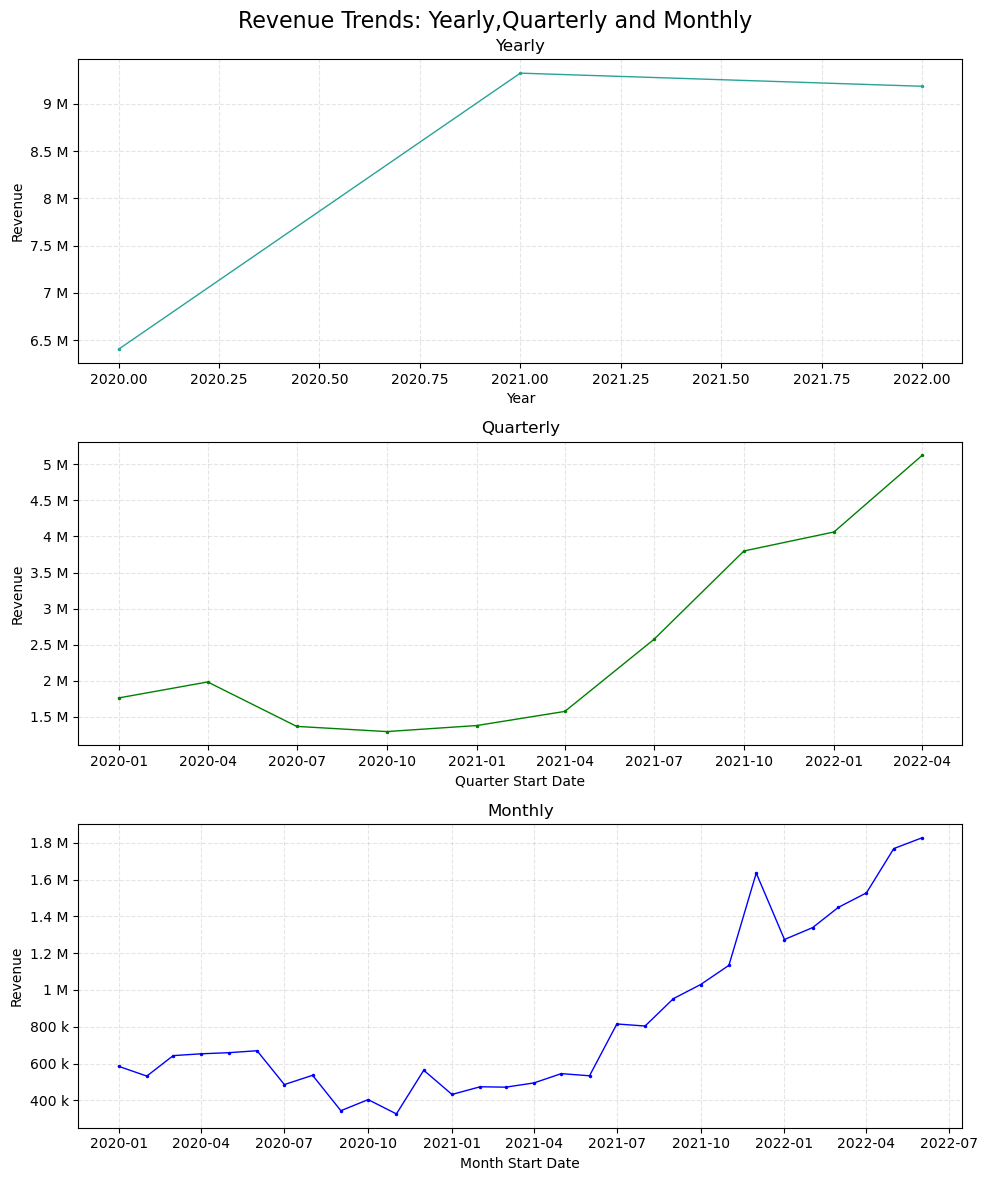

In [85]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot yearly revenue
ax[0].plot(yearly_revenue.iloc[:, 0], yearly_revenue.iloc[:, 1], color='#28A397', linewidth=1, marker='.', markersize=3)
ax[0].set_title('Yearly')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Revenue')
ax[0].yaxis.set_major_formatter(EngFormatter())
ax[0].grid(color='grey', alpha=0.2, linestyle='dashed')

# Plot quarterly revenue
ax[1].plot(quarterly_revenue.iloc[:, 0], quarterly_revenue.iloc[:, 1], color='g', linewidth=1, marker='.', markersize=3)
ax[1].set_title('Quarterly')
ax[1].set_xlabel('Quarter Start Date')
ax[1].set_ylabel('Revenue')
ax[1].yaxis.set_major_formatter(EngFormatter())
ax[1].grid(color='grey', alpha=0.2, linestyle='dashed')

# Plot monthly revenue
ax[2].plot(monthly_revenue.iloc[:, 0], monthly_revenue.iloc[:, 1], color='b', linewidth=1, marker='.', markersize=3)
ax[2].set_title('Monthly')
ax[2].set_xlabel('Month Start Date')
ax[2].set_ylabel('Revenue')
ax[2].yaxis.set_major_formatter(EngFormatter())
ax[2].grid(color='grey', alpha=0.2, linestyle='dashed')

plt.suptitle('Revenue Trends: Yearly,Quarterly and Monthly', fontsize=16)
plt.tight_layout()
plt.show()

Line Chart - Customers per year,month,week and day

In [86]:
customersperyear=sales_product_calender_table.groupby('StartofYear')['CustomerKey'].nunique().reset_index()
customerspermonth=sales_product_calender_table.groupby('StartofMonth')['CustomerKey'].nunique().reset_index()
customersperweek=sales_product_calender_table.groupby('StartofWeek')['CustomerKey'].nunique().reset_index()
customersperday=sales_product_calender_table.groupby('Date')['CustomerKey'].nunique().reset_index()

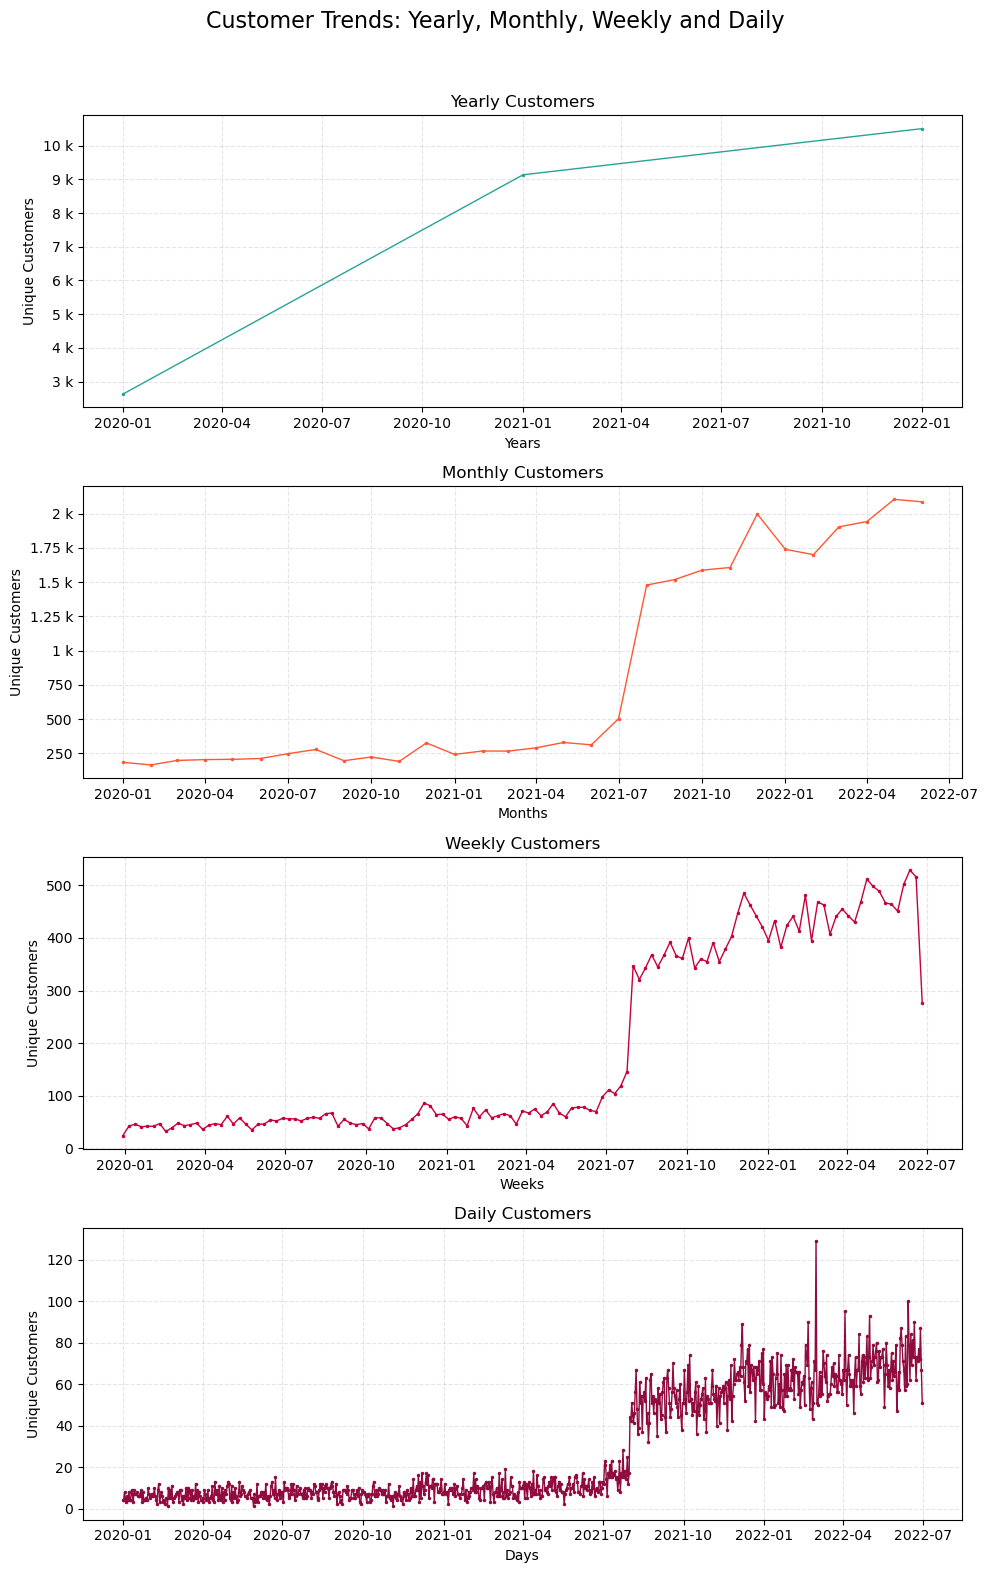

In [87]:
fig, ax = plt.subplots(4, 1, figsize=(10, 16))

# Plot customers per year
ax[0].plot(customersperyear.iloc[:, 0], customersperyear.iloc[:, 1], color='#28A397', linewidth=1, marker='.', markersize=3)
ax[0].set_title('Yearly Customers')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Unique Customers')
ax[0].yaxis.set_major_formatter(EngFormatter())
ax[0].grid(color='grey', alpha=0.2, linestyle='dashed')

# Plot customers per month
ax[1].plot(customerspermonth.iloc[:, 0], customerspermonth.iloc[:, 1], color='#FF5733', linewidth=1, marker='.', markersize=3)
ax[1].set_title('Monthly Customers')
ax[1].set_xlabel('Months')
ax[1].set_ylabel('Unique Customers')
ax[1].yaxis.set_major_formatter(EngFormatter())
ax[1].grid(color='grey', alpha=0.2, linestyle='dashed')

# Plot customers per week
ax[2].plot(customersperweek.iloc[:, 0], customersperweek.iloc[:, 1], color='#C70039', linewidth=1, marker='.', markersize=3)
ax[2].set_title('Weekly Customers')
ax[2].set_xlabel('Weeks')
ax[2].set_ylabel('Unique Customers')
ax[2].yaxis.set_major_formatter(EngFormatter())
ax[2].grid(color='grey', alpha=0.2, linestyle='dashed')

# Plot customers per day
ax[3].plot(customersperday.iloc[:, 0], customersperday.iloc[:, 1], color='#900C3F', linewidth=1, marker='.', markersize=3)
ax[3].set_title('Daily Customers')
ax[3].set_xlabel('Days')
ax[3].set_ylabel('Unique Customers')
ax[3].yaxis.set_major_formatter(EngFormatter())
ax[3].grid(color='grey', alpha=0.2, linestyle='dashed')
plt.suptitle('Customer Trends: Yearly, Monthly, Weekly and Daily', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

Last month revenue vs previous month revenue

In [88]:
current_month_revenue=sales_product_calender_table[sales_product_calender_table['StartofMonth']==max(sales_product_calender_table['StartofMonth'])].groupby(['StartofMonth'])['Revenue'].sum().reset_index()
display_unit_formatter(current_month_revenue['Revenue'].iloc[0], decimal_places=2)

'1.83 M'

In [89]:
previous_month = max(sales_product_calender_table['StartofMonth']) - pd.DateOffset(months=1)
previous_month_revenue=sales_product_calender_table[sales_product_calender_table['StartofMonth']==previous_month ].groupby(['StartofMonth'])['Revenue'].sum().reset_index()
display_unit_formatter(previous_month_revenue['Revenue'].iloc[0], decimal_places=2)

'1.77 M'

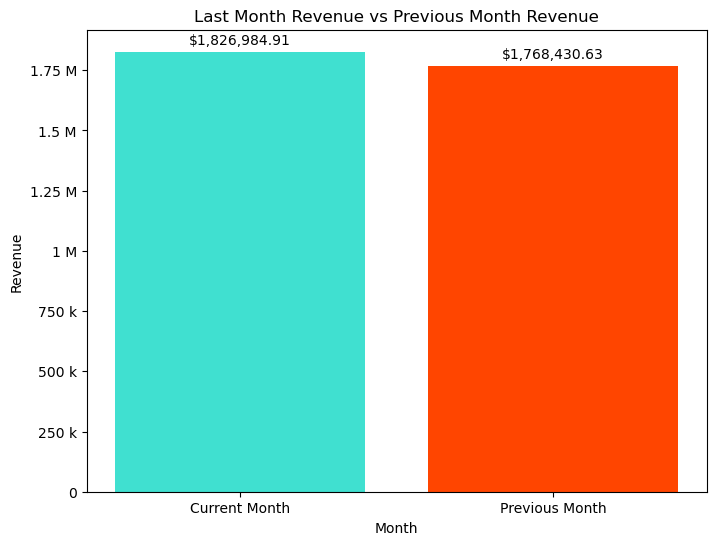

In [90]:
current_revenue = current_month_revenue['Revenue'].iloc[0]
previous_revenue = previous_month_revenue['Revenue'].iloc[0]
plt.figure(figsize=(8, 6))
bars = plt.bar(['Current Month', 'Previous Month'],
               [current_revenue, previous_revenue],
               color=['#40E0D0', '#FF4500'])

plt.bar_label(bars, labels=[f'${current_revenue:,.2f}', f'${previous_revenue:,.2f}'], padding=3)
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.title('Last Month Revenue vs Previous Month Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()

last month orders vs previous month orders

In [91]:
current_month_orders=sales_product_calender_table[sales_product_calender_table['StartofMonth']==max(sales_product_calender_table['StartofMonth'])].groupby(['StartofMonth'])['OrderNumber'].nunique().reset_index()
current_month_orders['OrderNumber'].iloc[0]

2146

In [92]:
previous_month_orders=sales_product_calender_table[sales_product_calender_table['StartofMonth']==previous_month].groupby(['StartofMonth'])['OrderNumber'].nunique().reset_index()
previous_month_orders['OrderNumber'].iloc[0]

2165

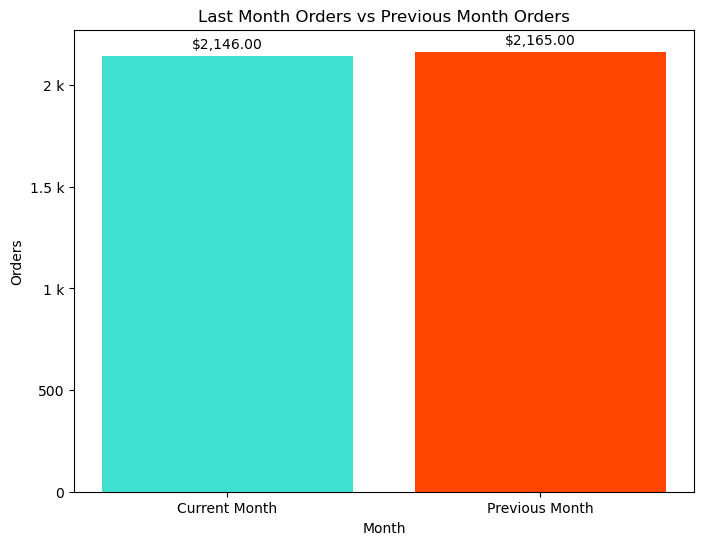

In [93]:
current_orders = current_month_orders['OrderNumber'].iloc[0]
previous_orders = previous_month_orders['OrderNumber'].iloc[0]
plt.figure(figsize=(8, 6))
bars = plt.bar(['Current Month', 'Previous Month'],
               [current_orders, previous_orders],
               color=['#40E0D0', '#FF4500'])

plt.bar_label(bars, labels=[f'${current_orders:,.2f}', f'${previous_orders:,.2f}'], padding=3)
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.title('Last Month Orders vs Previous Month Orders')
plt.ylabel('Orders')
plt.xlabel('Month')
plt.show()

last month returns vs previous month returns

In [94]:
returns_calender_table=pd.merge(returns_data,calender_lookup,how='left',left_on='ReturnDate',right_on='Date')

In [95]:
current_month_returns=returns_calender_table[returns_calender_table['StartofMonth']==max(returns_calender_table['StartofMonth'])].groupby(['StartofMonth'])['ReturnQuantity'].count().reset_index()
current_month_returns['ReturnQuantity'].iloc[0]

166

In [96]:
previous_month_returns=returns_calender_table[returns_calender_table['StartofMonth']==previous_month].groupby(['StartofMonth'])['ReturnQuantity'].count().reset_index()
previous_month_returns['ReturnQuantity'].iloc[0]

169

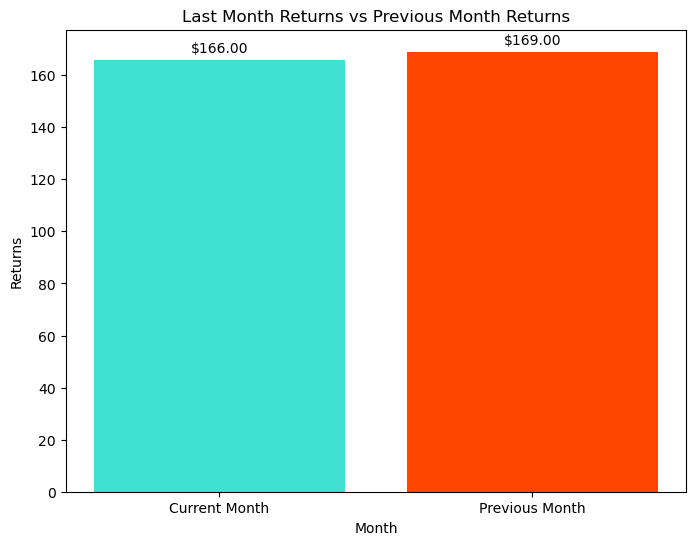

In [97]:
current_returns = current_month_returns['ReturnQuantity'].iloc[0]
previous_returns = previous_month_returns['ReturnQuantity'].iloc[0]
plt.figure(figsize=(8, 6))
bars = plt.bar(['Current Month', 'Previous Month'],
               [current_returns, previous_returns],
               color=['#40E0D0', '#FF4500'])

plt.bar_label(bars, labels=[f'${current_returns:,.2f}', f'${previous_returns:,.2f}'], padding=3)
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.title('Last Month Returns vs Previous Month Returns')
plt.ylabel('Returns')
plt.xlabel('Month')
plt.show()


orders per category

In [98]:
sales_pro_prosub_procat= sales_data \
.merge(product_lookup,how='left',on='ProductKey') \
.merge(product_subcategories_lookup,how='left',on='ProductSubcategoryKey') \
.merge(product_categories_lookup,how='left',on='ProductCategoryKey')
orders_by_category=sales_pro_prosub_procat.groupby('CategoryName')['OrderNumber'].nunique().reset_index().sort_values(by='OrderNumber',ascending=True)
orders_by_category

,CategoryName,OrderNumber
2,Clothing,6976
1,Bikes,13929
0,Accessories,16983


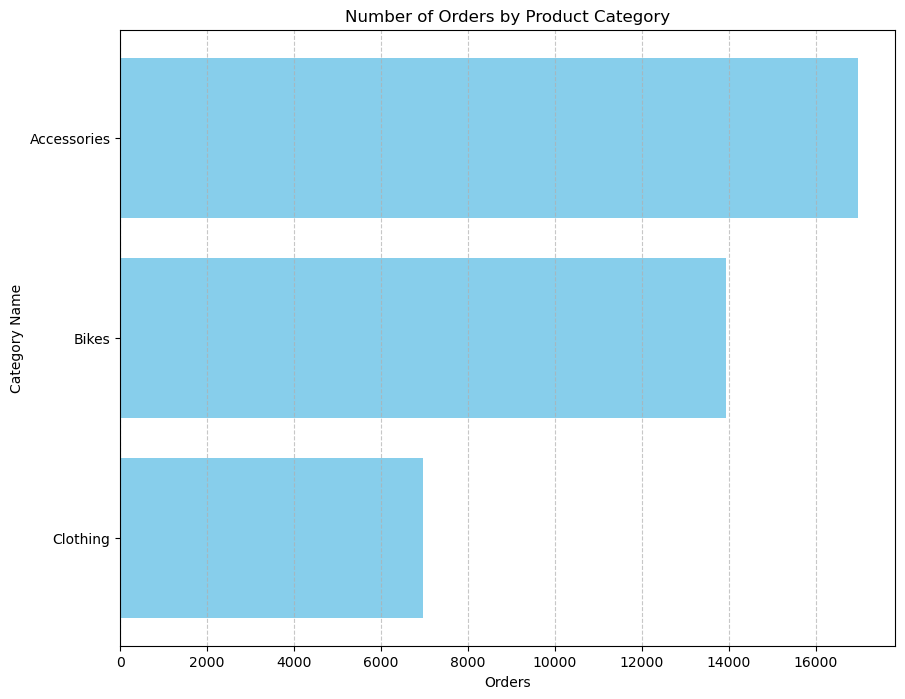

In [99]:
plt.figure(figsize=(10, 8))
plt.barh(orders_by_category['CategoryName'], orders_by_category['OrderNumber'], color='skyblue')
plt.xlabel('Orders')
plt.ylabel('Category Name')
plt.title('Number of Orders by Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

orders per income level

In [100]:
sales_customer=pd.merge(sales_data,customer_lookup,how='left',on='CustomerKey')
order_per_income=sales_customer.groupby('IncomeLevel')['OrderNumber'].nunique().reset_index()

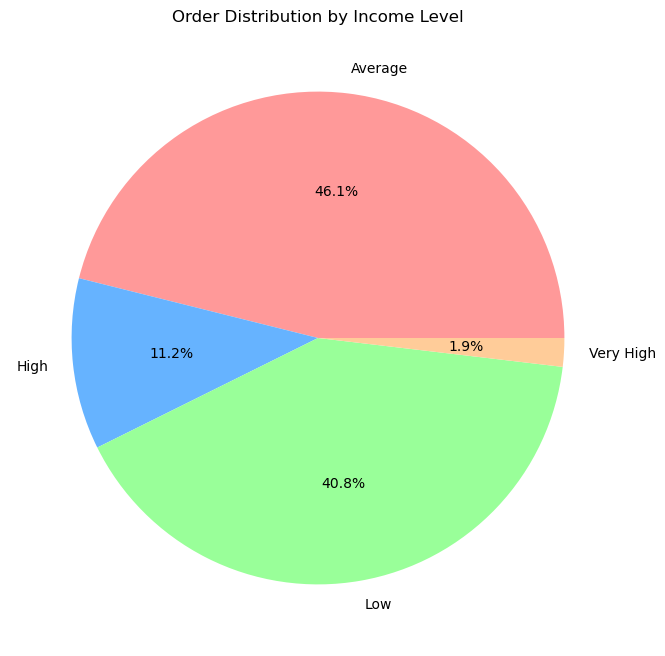

In [101]:
plt.figure(figsize=(8, 8))
plt.pie(order_per_income['OrderNumber'], labels=order_per_income['IncomeLevel'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Order Distribution by Income Level')
plt.show()

orders distribution per occupation

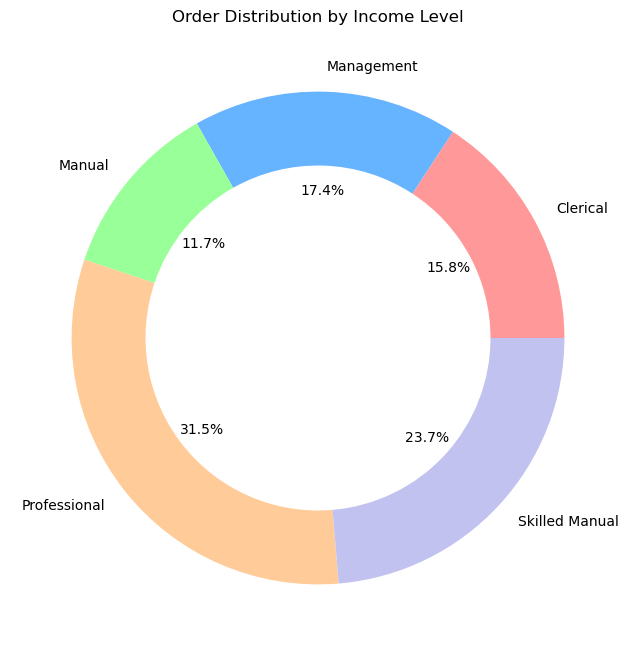

In [102]:
order_per_occupation=sales_customer.groupby('Occupation')['OrderNumber'].nunique().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(order_per_occupation['OrderNumber'], labels=order_per_occupation['Occupation'], autopct='%1.1f%%', colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],wedgeprops={'width': 0.3})
plt.title('Order Distribution by Income Level')
plt.show()

orders,revenue,returnrate per product (top 10)

In [103]:
op=sales_pro_prosub_procat
op['Revenue']=op['OrderQuantity']*op['ProductPrice']
result=op.groupby(['ProductName','ProductKey'])[['OrderNumber','Revenue','OrderQuantity']].agg({
    'OrderNumber': 'nunique',
    'Revenue': 'sum',
    'OrderQuantity': 'sum'}).reset_index()

product_returns_table=pd.merge(returns_data,product_lookup,how='left',on='ProductKey')
op1=product_returns_table.groupby('ProductKey')['ReturnQuantity'].sum().reset_index()
rt=result.merge(op1,how='left',on='ProductKey')
rt['ReturnRate']=(rt['ReturnQuantity']/rt['OrderQuantity']*100).round(2).astype(str)+'%'
rt[['ProductName','OrderNumber','Revenue','ReturnRate']].sort_values(by='OrderNumber',ascending=False).iloc[0:10].reset_index(drop=True)


,ProductName,OrderNumber,Revenue,ReturnRate
0,Water Bottle - 30 oz.,3983,39755.33,1.95%
1,Patch Kit/8 Patches,2952,13506.42,1.61%
2,Mountain Tire Tube,2846,28333.22,1.64%
3,Road Tire Tube,2173,17264.73,1.55%
4,"Sport-100 Helmet, Red",2099,73444.01,3.33%
5,AWC Logo Cap,2062,35864.64,1.11%
6,"Sport-100 Helmet, Blue",1995,67111.80,3.31%
7,Fender Set - Mountain,1975,87040.80,1.36%
8,"Sport-100 Helmet, Black",1940,65261.60,2.68%
9,Mountain Bottle Cage,1896,38061.90,2.02%


orders,revenue per customers (top 30)

In [104]:
cus=sales_product_table.merge(customer_lookup,how='left',on='CustomerKey')
cus['Revenue']=cus['ProductPrice']*cus['OrderQuantity']
cus.groupby(['CustomerKey','FullName']).agg({'OrderNumber':'nunique','Revenue':'sum'}).reset_index().sort_values(by='OrderNumber',ascending=False).iloc[0:30].reset_index(drop=True)

,CustomerKey,FullName,OrderNumber,Revenue
0,11330,Mr. Ryan Thompson,26,1596.61
1,11331,Mrs. Samantha Jenkins,26,1739.55
2,11223,Mrs. Hailey Patterson,26,1615.65
3,11091,Mr. Dalton Perez,26,1513.14
4,11300,Mr. Fernando Barnes,26,1838.99
5,11200,Mr. Jason Griffin,25,1613.87
6,11185,Mrs. Ashley Henderson,25,1716.73
7,11287,Mr. Henry Garcia,24,1442.94
8,11262,Mrs. Jennifer Simmons,24,1464.79
9,11566,Ms. April Shan,24,1424.45


Most ordered product

In [105]:
op.groupby('SubcategoryName')['OrderNumber'].nunique().reset_index().sort_values(by='OrderNumber',ascending=False).iloc[0:1].reset_index(drop=True)

,SubcategoryName,OrderNumber
0,Tires and Tubes,9084


most returned product

In [106]:
op=sales_pro_prosub_procat
op['Revenue']=op['OrderQuantity']*op['ProductPrice']
result=op.groupby(['ProductSubcategoryKey','SubcategoryName'])['OrderQuantity'].sum().reset_index()
product_returns_table=pd.merge(returns_data,product_lookup,how='left',on='ProductKey')
product_returns_table=product_returns_table.merge(product_subcategories_lookup,how='left',on='ProductSubcategoryKey')
op1=product_returns_table.groupby('ProductSubcategoryKey')['ReturnQuantity'].sum().reset_index()
rt=result.merge(op1,how='left',on='ProductSubcategoryKey')
rt['ReturnRate']=(rt['ReturnQuantity']/rt['OrderQuantity']*100).round(2)
rt[['SubcategoryName','ReturnRate']].sort_values(by='ReturnRate',ascending=False).iloc[0:1].reset_index(drop=True)


,SubcategoryName,ReturnRate
0,Shorts,4.24


top customer by revenue

In [107]:
s_p_c=sales_product_table.merge(customer_lookup,how='left',on='CustomerKey')
s_p_c['Revenue']=s_p_c['OrderQuantity']*s_p_c['ProductPrice']
s_p_c.groupby(['CustomerKey','FullName']).agg({'OrderNumber':'nunique','Revenue':'sum'}).reset_index().sort_values(by='Revenue',ascending=False).iloc[0:1].reset_index(drop=True)

,CustomerKey,FullName,OrderNumber,Revenue
0,11433,Mr. Maurice Shan,6,12407.95


orders per country

In [108]:
orderspercountry=sales_data.merge(territory_lookup,how='left',left_on='TerritoryKey',right_on='SalesTerritoryKey').groupby('Country')['OrderNumber'].nunique().reset_index()

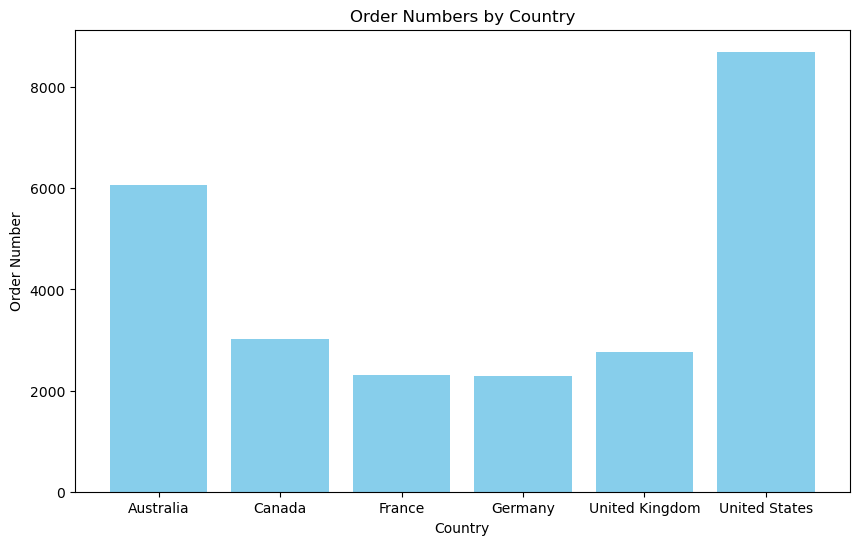

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(orderspercountry['Country'], orderspercountry['OrderNumber'], color='skyblue')
plt.title('Order Numbers by Country')
plt.xlabel('Country')
plt.ylabel('Order Number')
plt.show()


prev month orders vs last month orders per product

In [110]:
grouped=sales_product_calender_table.groupby(['ProductName','StartofMonth'])['OrderNumber'].nunique().reset_index()
grouped['prev_month']=grouped['OrderNumber'].shift(1).astype('Int64')
latest_month = calender_lookup['StartofMonth'].max()
grouped[(grouped['StartofMonth'] == latest_month) & (grouped['prev_month'].notnull())]

,ProductName,StartofMonth,OrderNumber,prev_month
11,AWC Logo Cap,2022-06-01,232,201
23,All-Purpose Bike Stand,2022-06-01,13,25
35,Bike Wash - Dissolver,2022-06-01,93,91
47,"Classic Vest, L",2022-06-01,21,13
59,"Classic Vest, M",2022-06-01,16,18
...,...,...,...,...
1680,"Touring-3000 Yellow, 62",2022-06-01,6,5
1692,Water Bottle - 30 oz.,2022-06-01,404,398
1704,"Women's Mountain Shorts, L",2022-06-01,31,26
1716,"Women's Mountain Shorts, M",2022-06-01,38,28


prev month revenue vs last month revenue per product

In [111]:
grouped=sales_product_calender_table.groupby(['ProductName','StartofMonth'])['Revenue'].sum().reset_index()
grouped['prev_month']=grouped['Revenue'].shift(1)
latest_month = calender_lookup['StartofMonth'].max()
grouped[(grouped['StartofMonth'] == latest_month) & (grouped['prev_month'].notnull())]

,ProductName,StartofMonth,Revenue,prev_month
11,AWC Logo Cap,2022-06-01,4034.88,3421.44
23,All-Purpose Bike Stand,2022-06-01,2067.00,3975.00
35,Bike Wash - Dissolver,2022-06-01,1518.45,1486.65
47,"Classic Vest, L",2022-06-01,1333.50,825.50
59,"Classic Vest, M",2022-06-01,1016.00,1143.00
...,...,...,...,...
1680,"Touring-3000 Yellow, 62",2022-06-01,4454.10,3711.75
1692,Water Bottle - 30 oz.,2022-06-01,4066.85,3902.18
1704,"Women's Mountain Shorts, L",2022-06-01,2169.69,1819.74
1716,"Women's Mountain Shorts, M",2022-06-01,2659.62,1959.72


prev month profit vs last month profit per product

In [112]:
sales_product_calender_table['Profit']=sales_product_calender_table['Revenue']-(sales_product_calender_table['ProductCost']*sales_product_calender_table['OrderQuantity'])
grouped=sales_product_calender_table.groupby(['ProductName','StartofMonth'])['Profit'].sum().reset_index()
grouped['prev_month']=grouped['Profit'].shift(1)
latest_month = calender_lookup['StartofMonth'].max()
grouped[(grouped['StartofMonth'] == latest_month) & (grouped['prev_month'].notnull())]

,ProductName,StartofMonth,Profit,prev_month
11,AWC Logo Cap,2022-06-01,1368.31,1160.28
23,All-Purpose Bike Stand,2022-06-01,1293.89,2488.25
35,Bike Wash - Dissolver,2022-06-01,951.18,931.26
47,"Classic Vest, L",2022-06-01,834.75,516.75
59,"Classic Vest, M",2022-06-01,636.00,715.50
...,...,...,...,...
1680,"Touring-3000 Yellow, 62",2022-06-01,1685.46,1404.55
1692,Water Bottle - 30 oz.,2022-06-01,2542.80,2439.84
1704,"Women's Mountain Shorts, L",2022-06-01,1358.11,1139.06
1716,"Women's Mountain Shorts, M",2022-06-01,1664.78,1226.68
